<a href="https://colab.research.google.com/github/luciainnocenti/IncrementalLearning/blob/improvement_Lucia3/ICaRLMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import GitHub repository

In [1]:
import os
import logging
import sys

In [2]:
if not os.path.isdir('./DatasetCIFAR'):
  !git clone -b improvement_Lucia3 https://github.com/luciainnocenti/IncrementalLearning.git
  !mv 'IncrementalLearning' 'DatasetCIFAR'

Cloning into 'IncrementalLearning'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 2526 (delta 53), reused 0 (delta 0), pack-reused 2431
Receiving objects: 100% (2526/2526), 3.03 MiB | 5.05 MiB/s, done.
Resolving deltas: 100% (1615/1615), done.


# Import packages

In [3]:
from DatasetCIFAR.data_set import Dataset 
from DatasetCIFAR.data_set import Subset
from DatasetCIFAR import ResNet
from DatasetCIFAR import utils
from DatasetCIFAR import params
from DatasetCIFAR import ICaRLModel
from torchvision import models
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from torchvision import transforms
from torch.utils.data import DataLoader
from torch.nn import functional as F
import random
random.seed(params.SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
print(params.SEED)
print(params.NUM_WORKERS)

653
4


# Define Datasets

In [5]:
train_transformer = transforms.Compose([transforms.RandomCrop(size = 32, padding=4),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transformer = transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
trainDS = Dataset(train=True)
testDS = Dataset(train=False)

Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [7]:
train_splits = trainDS.splits
test_splits = testDS.splits

# Define Network

In [8]:
ICaRL = ResNet.resnet32(num_classes=100)
ICaRL =  ICaRL.to(params.DEVICE)

In [9]:
exemplars = [None]*100

test_indexes =  []
accs = []

At step  0  and at epoch =  0  the loss is =  0.03036373108625412  and accuracy is =  0.1678
At step  0  and at epoch =  1  the loss is =  0.03387894481420517  and accuracy is =  0.3914
At step  0  and at epoch =  2  the loss is =  0.02325008250772953  and accuracy is =  0.4808
At step  0  and at epoch =  3  the loss is =  0.019889462739229202  and accuracy is =  0.5354
At step  0  and at epoch =  4  the loss is =  0.025236880406737328  and accuracy is =  0.5876
At step  0  and at epoch =  5  the loss is =  0.017271460965275764  and accuracy is =  0.623
At step  0  and at epoch =  6  the loss is =  0.00952813308686018  and accuracy is =  0.6518
At step  0  and at epoch =  7  the loss is =  0.024511737748980522  and accuracy is =  0.6708
At step  0  and at epoch =  8  the loss is =  0.023660339415073395  and accuracy is =  0.666
At step  0  and at epoch =  9  the loss is =  0.026327867060899734  and accuracy is =  0.6952
At step  0  and at epoch =  10  the loss is =  0.01490887627005577

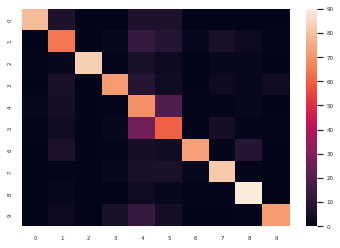

At step  10  and at epoch =  0  the loss is =  0.03015030361711979  and accuracy is =  0.3028571428571429
At step  10  and at epoch =  1  the loss is =  0.028789134696125984  and accuracy is =  0.3932857142857143
At step  10  and at epoch =  2  the loss is =  0.02898959070444107  and accuracy is =  0.4734285714285714
At step  10  and at epoch =  3  the loss is =  0.0286352951079607  and accuracy is =  0.5345714285714286
At step  10  and at epoch =  4  the loss is =  0.02571200393140316  and accuracy is =  0.5648571428571428
At step  10  and at epoch =  5  the loss is =  0.025099191814661026  and accuracy is =  0.591
At step  10  and at epoch =  6  the loss is =  0.021759936586022377  and accuracy is =  0.615
At step  10  and at epoch =  7  the loss is =  0.02223324589431286  and accuracy is =  0.634
At step  10  and at epoch =  8  the loss is =  0.02113606221973896  and accuracy is =  0.6554285714285715
At step  10  and at epoch =  9  the loss is =  0.01920430362224579  and accuracy is

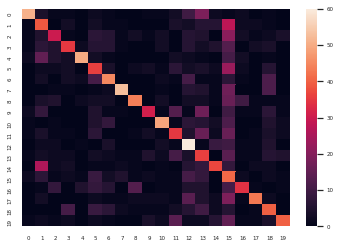

At step  20  and at epoch =  0  the loss is =  0.03568458557128906  and accuracy is =  0.2757142857142857
At step  20  and at epoch =  1  the loss is =  0.038352999836206436  and accuracy is =  0.3424285714285714
At step  20  and at epoch =  2  the loss is =  0.033506423234939575  and accuracy is =  0.42328571428571427
At step  20  and at epoch =  3  the loss is =  0.036411214619874954  and accuracy is =  0.4807142857142857
At step  20  and at epoch =  4  the loss is =  0.03241754695773125  and accuracy is =  0.5271428571428571
At step  20  and at epoch =  5  the loss is =  0.03425203263759613  and accuracy is =  0.5701428571428572
At step  20  and at epoch =  6  the loss is =  0.032207321375608444  and accuracy is =  0.5828571428571429
At step  20  and at epoch =  7  the loss is =  0.028189072385430336  and accuracy is =  0.6132857142857143
At step  20  and at epoch =  8  the loss is =  0.02953670173883438  and accuracy is =  0.6242857142857143
At step  20  and at epoch =  9  the loss

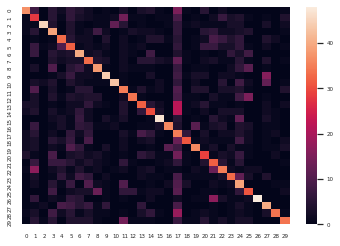

At step  30  and at epoch =  0  the loss is =  0.04294144734740257  and accuracy is =  0.27503566333808843
At step  30  and at epoch =  1  the loss is =  0.03918497636914253  and accuracy is =  0.3522111269614836
At step  30  and at epoch =  2  the loss is =  0.03972725570201874  and accuracy is =  0.4232524964336662
At step  30  and at epoch =  3  the loss is =  0.03894650191068649  and accuracy is =  0.4731811697574893
At step  30  and at epoch =  4  the loss is =  0.04029339179396629  and accuracy is =  0.5108416547788873
At step  30  and at epoch =  5  the loss is =  0.03949249908328056  and accuracy is =  0.5370898716119828
At step  30  and at epoch =  6  the loss is =  0.04167526960372925  and accuracy is =  0.5522111269614836
At step  30  and at epoch =  7  the loss is =  0.03940126299858093  and accuracy is =  0.5888730385164052
At step  30  and at epoch =  8  the loss is =  0.03525233268737793  and accuracy is =  0.6027104136947218
At step  30  and at epoch =  9  the loss is =

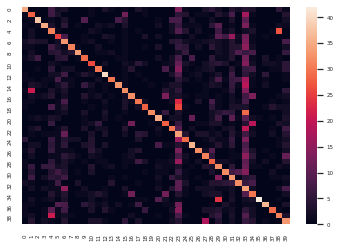

At step  40  and at epoch =  0  the loss is =  0.055406730622053146  and accuracy is =  0.2642857142857143
At step  40  and at epoch =  1  the loss is =  0.05409404635429382  and accuracy is =  0.33185714285714285
At step  40  and at epoch =  2  the loss is =  0.054515041410923004  and accuracy is =  0.37814285714285717
At step  40  and at epoch =  3  the loss is =  0.055596571415662766  and accuracy is =  0.425
At step  40  and at epoch =  4  the loss is =  0.055139731615781784  and accuracy is =  0.46885714285714286
At step  40  and at epoch =  5  the loss is =  0.05075368285179138  and accuracy is =  0.5014285714285714
At step  40  and at epoch =  6  the loss is =  0.04758350923657417  and accuracy is =  0.5147142857142857
At step  40  and at epoch =  7  the loss is =  0.04895569756627083  and accuracy is =  0.5388571428571428
At step  40  and at epoch =  8  the loss is =  0.04913081228733063  and accuracy is =  0.5591428571428572
At step  40  and at epoch =  9  the loss is =  0.048

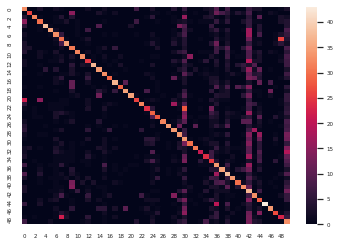

At step  50  and at epoch =  0  the loss is =  0.06846655905246735  and accuracy is =  0.2512857142857143
At step  50  and at epoch =  1  the loss is =  0.0688735619187355  and accuracy is =  0.3417142857142857
At step  50  and at epoch =  2  the loss is =  0.06877850741147995  and accuracy is =  0.393
At step  50  and at epoch =  3  the loss is =  0.061216071248054504  and accuracy is =  0.436
At step  50  and at epoch =  4  the loss is =  0.06191171705722809  and accuracy is =  0.47514285714285714
At step  50  and at epoch =  5  the loss is =  0.06616474688053131  and accuracy is =  0.5028571428571429
At step  50  and at epoch =  6  the loss is =  0.058551136404275894  and accuracy is =  0.521
At step  50  and at epoch =  7  the loss is =  0.05521566793322563  and accuracy is =  0.5401428571428571
At step  50  and at epoch =  8  the loss is =  0.06561414152383804  and accuracy is =  0.5615714285714286
At step  50  and at epoch =  9  the loss is =  0.05597839131951332  and accuracy is

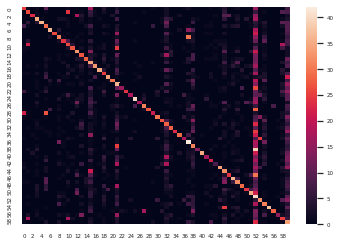

At step  60  and at epoch =  0  the loss is =  0.06946782767772675  and accuracy is =  0.25358166189111747
At step  60  and at epoch =  1  the loss is =  0.06908448040485382  and accuracy is =  0.32335243553008597
At step  60  and at epoch =  2  the loss is =  0.06870075315237045  and accuracy is =  0.37449856733524356
At step  60  and at epoch =  3  the loss is =  0.07695157825946808  and accuracy is =  0.40787965616045846
At step  60  and at epoch =  4  the loss is =  0.07611367106437683  and accuracy is =  0.44169054441260747
At step  60  and at epoch =  5  the loss is =  0.0695808082818985  and accuracy is =  0.4614613180515759
At step  60  and at epoch =  6  the loss is =  0.06804749369621277  and accuracy is =  0.48681948424068766
At step  60  and at epoch =  7  the loss is =  0.06920651346445084  and accuracy is =  0.4959885386819484
At step  60  and at epoch =  8  the loss is =  0.06880316883325577  and accuracy is =  0.5111747851002866
At step  60  and at epoch =  9  the loss 

Streaming output truncated to the last 5000 lines.
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ign

task: 60 train accuracy = 0.0798


Streaming output truncated to the last 5000 lines.
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ign

task: 60 test accuracy = 0.2644285714285714


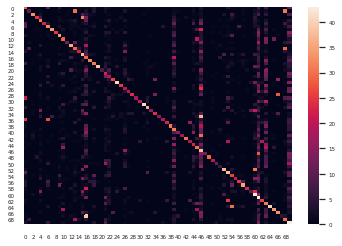

At step  70  and at epoch =  0  the loss is =  0.07980421185493469  and accuracy is =  0.2574679943100996


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  1  the loss is =  0.08160852640867233  and accuracy is =  0.39758179231863444


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  2  the loss is =  0.07592892646789551  and accuracy is =  0.45846372688477954


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  3  the loss is =  0.07268253713846207  and accuracy is =  0.5069701280227596


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  4  the loss is =  0.07779897004365921  and accuracy is =  0.5275960170697013


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  5  the loss is =  0.07927414774894714  and accuracy is =  0.5682788051209103


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  6  the loss is =  0.0750962421298027  and accuracy is =  0.5864864864864865


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  7  the loss is =  0.0764479786157608  and accuracy is =  0.5978662873399716


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  8  the loss is =  0.07679484039545059  and accuracy is =  0.6187766714082503


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  9  the loss is =  0.07962576299905777  and accuracy is =  0.6341394025604552


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  10  the loss is =  0.0766436904668808  and accuracy is =  0.642674253200569


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  11  the loss is =  0.07527662068605423  and accuracy is =  0.6557610241820768


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  12  the loss is =  0.07737063616514206  and accuracy is =  0.6568990042674253


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  13  the loss is =  0.07850351184606552  and accuracy is =  0.666429587482219


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  14  the loss is =  0.07308086007833481  and accuracy is =  0.6840682788051209


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  15  the loss is =  0.0763431116938591  and accuracy is =  0.6786628733997155


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  16  the loss is =  0.07704693078994751  and accuracy is =  0.7011379800853486


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  17  the loss is =  0.07895075529813766  and accuracy is =  0.711095305832148


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  18  the loss is =  0.07604247331619263  and accuracy is =  0.705547652916074


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  19  the loss is =  0.08157214522361755  and accuracy is =  0.7128022759601707


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  20  the loss is =  0.07639844715595245  and accuracy is =  0.7113798008534851


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  21  the loss is =  0.0766037330031395  and accuracy is =  0.7183499288762447


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  22  the loss is =  0.07754284143447876  and accuracy is =  0.7295874822190611


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  23  the loss is =  0.07855233550071716  and accuracy is =  0.7261735419630156


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  24  the loss is =  0.07695990055799484  and accuracy is =  0.7322901849217639


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  25  the loss is =  0.07136695086956024  and accuracy is =  0.7308677098150782


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  26  the loss is =  0.07249226421117783  and accuracy is =  0.744950213371266


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  27  the loss is =  0.07339996099472046  and accuracy is =  0.7391180654338549


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  28  the loss is =  0.07621366530656815  and accuracy is =  0.741678520625889


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  29  the loss is =  0.07203548401594162  and accuracy is =  0.7549075391180654


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  30  the loss is =  0.07664941996335983  and accuracy is =  0.7503556187766715


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  31  the loss is =  0.07418138533830643  and accuracy is =  0.7490753911806544


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  32  the loss is =  0.0714314803481102  and accuracy is =  0.7584637268847795


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  33  the loss is =  0.07542375475168228  and accuracy is =  0.7603129445234709


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  34  the loss is =  0.07862573862075806  and accuracy is =  0.7600284495021337


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  35  the loss is =  0.07682420313358307  and accuracy is =  0.765149359886202


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  36  the loss is =  0.07381879538297653  and accuracy is =  0.7675675675675676


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  37  the loss is =  0.06882482767105103  and accuracy is =  0.7631578947368421


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  38  the loss is =  0.07098911702632904  and accuracy is =  0.7691322901849218


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  39  the loss is =  0.07399775832891464  and accuracy is =  0.7786628733997155


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  40  the loss is =  0.0785536840558052  and accuracy is =  0.7812233285917497


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  41  the loss is =  0.07595379650592804  and accuracy is =  0.7773826458036984


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  42  the loss is =  0.07565547525882721  and accuracy is =  0.7698435277382646


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  43  the loss is =  0.07542899250984192  and accuracy is =  0.7782361308677098


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  44  the loss is =  0.0727054551243782  and accuracy is =  0.7813655761024182


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  45  the loss is =  0.07053883373737335  and accuracy is =  0.7827880512091039


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  46  the loss is =  0.07308262586593628  and accuracy is =  0.7788051209103841


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  47  the loss is =  0.07587890326976776  and accuracy is =  0.7917496443812233


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  48  the loss is =  0.07330257445573807  and accuracy is =  0.7852062588904695


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  49  the loss is =  0.07033492624759674  and accuracy is =  0.8288762446657183


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  50  the loss is =  0.07136984914541245  and accuracy is =  0.8421052631578947


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  51  the loss is =  0.06884759664535522  and accuracy is =  0.8445234708392603


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  52  the loss is =  0.0736527144908905  and accuracy is =  0.8462304409672831


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  53  the loss is =  0.06869306415319443  and accuracy is =  0.8453769559032717


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  54  the loss is =  0.06834785640239716  and accuracy is =  0.8514935988620199


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  55  the loss is =  0.07102061063051224  and accuracy is =  0.8504978662873399


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  56  the loss is =  0.06891180574893951  and accuracy is =  0.8559032716927454


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  57  the loss is =  0.06724728643894196  and accuracy is =  0.857325746799431


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  58  the loss is =  0.06986117362976074  and accuracy is =  0.856045519203414


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  59  the loss is =  0.0693138986825943  and accuracy is =  0.8537695590327169


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  60  the loss is =  0.07021569460630417  and accuracy is =  0.8541963015647226


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  61  the loss is =  0.06922198832035065  and accuracy is =  0.856045519203414


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  62  the loss is =  0.06623344123363495  and accuracy is =  0.8571834992887625


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  63  the loss is =  0.06787868589162827  and accuracy is =  0.8614509246088193


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  64  the loss is =  0.06609117239713669  and accuracy is =  0.8652916073968706


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  65  the loss is =  0.06893082708120346  and accuracy is =  0.864153627311522


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  66  the loss is =  0.06825704872608185  and accuracy is =  0.861877667140825


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  67  the loss is =  0.06654170900583267  and accuracy is =  0.8677098150782361


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  68  the loss is =  0.0675741508603096  and accuracy is =  0.8718349928876244


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  70  and at epoch =  69  the loss is =  0.06830278038978577  and accuracy is =  0.8699857752489332


Streaming output truncated to the last 5000 lines.
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ign

task: 70 train accuracy = 0.0732


Streaming output truncated to the last 5000 lines.
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ign

task: 70 test accuracy = 0.245125


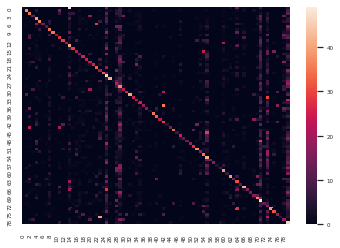

At step  80  and at epoch =  0  the loss is =  0.09177514910697937  and accuracy is =  0.25357142857142856


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  1  the loss is =  0.09809276461601257  and accuracy is =  0.3598571428571429


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  2  the loss is =  0.09373069554567337  and accuracy is =  0.3985714285714286


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  3  the loss is =  0.09113302081823349  and accuracy is =  0.4392857142857143


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  4  the loss is =  0.09361747652292252  and accuracy is =  0.4662857142857143


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  5  the loss is =  0.09174025058746338  and accuracy is =  0.49028571428571427


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  6  the loss is =  0.0880969762802124  and accuracy is =  0.5154285714285715


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  7  the loss is =  0.0960039421916008  and accuracy is =  0.5338571428571428


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  8  the loss is =  0.09649458527565002  and accuracy is =  0.5554285714285714


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  9  the loss is =  0.09247450530529022  and accuracy is =  0.571


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  10  the loss is =  0.09191446751356125  and accuracy is =  0.5845714285714285


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  11  the loss is =  0.09093602746725082  and accuracy is =  0.5977142857142858


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  12  the loss is =  0.0895456075668335  and accuracy is =  0.6037142857142858


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  13  the loss is =  0.09236103296279907  and accuracy is =  0.6101428571428571


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  14  the loss is =  0.08771520107984543  and accuracy is =  0.6221428571428571


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  15  the loss is =  0.09072721749544144  and accuracy is =  0.6307142857142857


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  16  the loss is =  0.09115633368492126  and accuracy is =  0.6377142857142857


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  17  the loss is =  0.08703333884477615  and accuracy is =  0.6515714285714286


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  18  the loss is =  0.09316259622573853  and accuracy is =  0.6575714285714286


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  19  the loss is =  0.09014216810464859  and accuracy is =  0.662


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  20  the loss is =  0.09493352472782135  and accuracy is =  0.6701428571428572


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  21  the loss is =  0.0896017998456955  and accuracy is =  0.6754285714285714


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  22  the loss is =  0.09276146441698074  and accuracy is =  0.6755714285714286


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  23  the loss is =  0.09846711903810501  and accuracy is =  0.683


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  24  the loss is =  0.0938243493437767  and accuracy is =  0.6872857142857143


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  25  the loss is =  0.08956901729106903  and accuracy is =  0.6898571428571428


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  26  the loss is =  0.0885455459356308  and accuracy is =  0.6965714285714286


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  27  the loss is =  0.0917484387755394  and accuracy is =  0.704


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  28  the loss is =  0.08245939761400223  and accuracy is =  0.7048571428571428


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  29  the loss is =  0.09664404392242432  and accuracy is =  0.7057142857142857


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  30  the loss is =  0.08104996383190155  and accuracy is =  0.7184285714285714


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  31  the loss is =  0.09498681873083115  and accuracy is =  0.7088571428571429


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  32  the loss is =  0.0900772213935852  and accuracy is =  0.7152857142857143


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  33  the loss is =  0.090119369328022  and accuracy is =  0.7274285714285714


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  34  the loss is =  0.0936175137758255  and accuracy is =  0.7322857142857143


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  35  the loss is =  0.09238895028829575  and accuracy is =  0.7261428571428571


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  36  the loss is =  0.08798857033252716  and accuracy is =  0.7292857142857143


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  37  the loss is =  0.08753819763660431  and accuracy is =  0.7312857142857143


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  38  the loss is =  0.09122946858406067  and accuracy is =  0.7377142857142858


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  39  the loss is =  0.09320616722106934  and accuracy is =  0.7427142857142857


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  40  the loss is =  0.08268522471189499  and accuracy is =  0.7474285714285714


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  41  the loss is =  0.08494553714990616  and accuracy is =  0.7518571428571429


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  42  the loss is =  0.09458347409963608  and accuracy is =  0.7431428571428571


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  43  the loss is =  0.08707772940397263  and accuracy is =  0.7474285714285714


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  44  the loss is =  0.08674642443656921  and accuracy is =  0.7545714285714286


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  45  the loss is =  0.08955290913581848  and accuracy is =  0.753


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  46  the loss is =  0.09119083732366562  and accuracy is =  0.752


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  47  the loss is =  0.08806750178337097  and accuracy is =  0.7554285714285714


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  48  the loss is =  0.08685281872749329  and accuracy is =  0.7594285714285715


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  49  the loss is =  0.08438900113105774  and accuracy is =  0.8057142857142857


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  50  the loss is =  0.08189947158098221  and accuracy is =  0.8288571428571428


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  51  the loss is =  0.08033271133899689  and accuracy is =  0.8267142857142857


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  52  the loss is =  0.08466644585132599  and accuracy is =  0.8318571428571429


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  53  the loss is =  0.08641278743743896  and accuracy is =  0.8317142857142857


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  54  the loss is =  0.09074483811855316  and accuracy is =  0.839


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  55  the loss is =  0.07861527800559998  and accuracy is =  0.8407142857142857


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  56  the loss is =  0.07917162775993347  and accuracy is =  0.8387142857142857


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  57  the loss is =  0.08378616720438004  and accuracy is =  0.8464285714285714


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  58  the loss is =  0.07599644362926483  and accuracy is =  0.8417142857142857


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  59  the loss is =  0.08230309188365936  and accuracy is =  0.8427142857142857


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  60  the loss is =  0.08321456611156464  and accuracy is =  0.8431428571428572


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  61  the loss is =  0.08498083055019379  and accuracy is =  0.8457142857142858


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  62  the loss is =  0.08049087226390839  and accuracy is =  0.8447142857142858


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  63  the loss is =  0.0821966826915741  and accuracy is =  0.8524285714285714


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  64  the loss is =  0.08230752497911453  and accuracy is =  0.8537142857142858


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  65  the loss is =  0.08250708132982254  and accuracy is =  0.852


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  66  the loss is =  0.08636681735515594  and accuracy is =  0.8495714285714285


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  67  the loss is =  0.0750250443816185  and accuracy is =  0.8538571428571429


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  68  the loss is =  0.07932764291763306  and accuracy is =  0.8542857142857143


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  80  and at epoch =  69  the loss is =  0.07850152999162674  and accuracy is =  0.8555714285714285


Streaming output truncated to the last 5000 lines.
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ign

task: 80 train accuracy = 0.0752


Streaming output truncated to the last 5000 lines.
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ign

task: 80 test accuracy = 0.1971111111111111


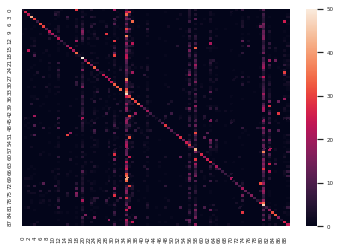

At step  90  and at epoch =  0  the loss is =  0.10652666538953781  and accuracy is =  0.273352435530086


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  1  the loss is =  0.09588303416967392  and accuracy is =  0.40673352435530086


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  2  the loss is =  0.09311535954475403  and accuracy is =  0.45501432664756447


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  3  the loss is =  0.09805411100387573  and accuracy is =  0.48911174785100286


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  4  the loss is =  0.10070037096738815  and accuracy is =  0.5167621776504298


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  5  the loss is =  0.10190027207136154  and accuracy is =  0.5391117478510029


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  6  the loss is =  0.09305362403392792  and accuracy is =  0.5564469914040114


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  7  the loss is =  0.11114426702260971  and accuracy is =  0.5637535816618912


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  8  the loss is =  0.10346394032239914  and accuracy is =  0.5886819484240687


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  9  the loss is =  0.10153939574956894  and accuracy is =  0.5959885386819485


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  10  the loss is =  0.09874671697616577  and accuracy is =  0.6127507163323782


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  11  the loss is =  0.10211924463510513  and accuracy is =  0.6189111747851003


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  12  the loss is =  0.09806127846240997  and accuracy is =  0.6310888252148997


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  13  the loss is =  0.09550759196281433  and accuracy is =  0.6385386819484241


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  14  the loss is =  0.1034136712551117  and accuracy is =  0.6482808022922636


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  15  the loss is =  0.1040705218911171  and accuracy is =  0.66189111747851


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  16  the loss is =  0.10154802352190018  and accuracy is =  0.6637535816618911


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  17  the loss is =  0.09864379465579987  and accuracy is =  0.6767908309455587


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  18  the loss is =  0.09696204215288162  and accuracy is =  0.675214899713467


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  19  the loss is =  0.09055215120315552  and accuracy is =  0.6826647564469914


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  20  the loss is =  0.08953908830881119  and accuracy is =  0.6929799426934098


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  21  the loss is =  0.09765127301216125  and accuracy is =  0.6967048710601719


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  22  the loss is =  0.09861022233963013  and accuracy is =  0.6988538681948424


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  23  the loss is =  0.0938812643289566  and accuracy is =  0.701002865329513


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  24  the loss is =  0.09849342703819275  and accuracy is =  0.712893982808023


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  25  the loss is =  0.09233957529067993  and accuracy is =  0.7150429799426934


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  26  the loss is =  0.10042697936296463  and accuracy is =  0.7120343839541547


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  27  the loss is =  0.10725408047437668  and accuracy is =  0.7138968481375358


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  28  the loss is =  0.09298799932003021  and accuracy is =  0.7186246418338109


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  29  the loss is =  0.09965534508228302  and accuracy is =  0.7303724928366763


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  30  the loss is =  0.09492320567369461  and accuracy is =  0.7289398280802293


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  31  the loss is =  0.09472052752971649  and accuracy is =  0.7343839541547278


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  32  the loss is =  0.09572623670101166  and accuracy is =  0.7319484240687679


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  33  the loss is =  0.08939476311206818  and accuracy is =  0.7363896848137536


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  34  the loss is =  0.10433519631624222  and accuracy is =  0.7379656160458453


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  35  the loss is =  0.09731751680374146  and accuracy is =  0.7339541547277937


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  36  the loss is =  0.0913717970252037  and accuracy is =  0.7461318051575931


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  37  the loss is =  0.09867764264345169  and accuracy is =  0.7464183381088825


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  38  the loss is =  0.10087613761425018  and accuracy is =  0.7551575931232092


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  39  the loss is =  0.09653264284133911  and accuracy is =  0.7643266475644699


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  40  the loss is =  0.09287166595458984  and accuracy is =  0.7412607449856734


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  41  the loss is =  0.09795136749744415  and accuracy is =  0.7567335243553008


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  42  the loss is =  0.09450044482946396  and accuracy is =  0.7502865329512894


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  43  the loss is =  0.09386955201625824  and accuracy is =  0.7532951289398281


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  44  the loss is =  0.0913052037358284  and accuracy is =  0.7598853868194843


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  45  the loss is =  0.08866161853075027  and accuracy is =  0.7613180515759312


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  46  the loss is =  0.0930798277258873  and accuracy is =  0.7719197707736389


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  47  the loss is =  0.10176097601652145  and accuracy is =  0.7680515759312321


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  48  the loss is =  0.09617356210947037  and accuracy is =  0.7656160458452722


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  49  the loss is =  0.08929921686649323  and accuracy is =  0.8073065902578797


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  50  the loss is =  0.08745528012514114  and accuracy is =  0.8242120343839542


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  51  the loss is =  0.0896201953291893  and accuracy is =  0.8315186246418338


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  52  the loss is =  0.09303109347820282  and accuracy is =  0.8356733524355301


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  53  the loss is =  0.08746957033872604  and accuracy is =  0.8332378223495702


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  54  the loss is =  0.085187628865242  and accuracy is =  0.8313753581661891


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  55  the loss is =  0.09241131693124771  and accuracy is =  0.8382521489971346


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  56  the loss is =  0.08695238828659058  and accuracy is =  0.8402578796561605


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  57  the loss is =  0.0860815942287445  and accuracy is =  0.8409742120343839


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  58  the loss is =  0.09582937508821487  and accuracy is =  0.8399713467048711


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  59  the loss is =  0.09122448414564133  and accuracy is =  0.8454154727793697


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  60  the loss is =  0.09156400710344315  and accuracy is =  0.8426934097421204


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  61  the loss is =  0.08855566382408142  and accuracy is =  0.8438395415472779


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  62  the loss is =  0.09463760256767273  and accuracy is =  0.8409742120343839


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  63  the loss is =  0.08471006155014038  and accuracy is =  0.8464183381088826


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  64  the loss is =  0.0857943445444107  and accuracy is =  0.8478510028653296


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  65  the loss is =  0.08983436971902847  and accuracy is =  0.8525787965616046


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  66  the loss is =  0.09269314259290695  and accuracy is =  0.854727793696275


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  67  the loss is =  0.09377182275056839  and accuracy is =  0.8537249283667622


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  68  the loss is =  0.08671746402978897  and accuracy is =  0.8484240687679083


Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable


At step  90  and at epoch =  69  the loss is =  0.08993788063526154  and accuracy is =  0.8510028653295129


Streaming output truncated to the last 5000 lines.
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ign

task: 90 train accuracy = 0.0704


Streaming output truncated to the last 5000 lines.
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ignored when trying to write to the signal wakeup fd:
BlockingIOError: [Errno 11] Resource temporarily unavailable
Exception ign

task: 90 test accuracy = 0.17


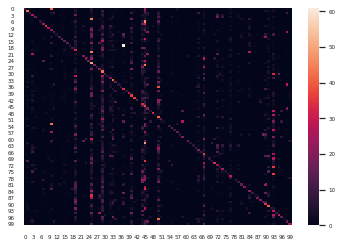

In [10]:
for task in range(0, 100, params.TASK_SIZE):
  train_indexes = trainDS.__getIndexesGroups__(task)
  test_indexes = test_indexes + testDS.__getIndexesGroups__(task)

  train_dataset = Subset(trainDS, train_indexes, transform = train_transformer)
  test_dataset = Subset(testDS, test_indexes, transform = test_transformer)

  train_loader = DataLoader( train_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE, shuffle=True)
  test_loader = DataLoader( test_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE , shuffle=True )
  
  ICaRL, exemplars = ICaRLModel.incrementalTrain(task, trainDS, ICaRL, exemplars, train_transformer)

  col = []
  for i,x in enumerate( train_splits[ :int(task/10) + 1]) : 
    v = np.array(x)
    col = np.concatenate( (col,v), axis = None)
    col = col.astype(int)
  mean = None
  total = 0.0
  running_corrects = 0.0
  for img, lbl, _ in train_loader:
      img = img.float().to(params.DEVICE)
      lbl = lbl.to(params.DEVICE)
      preds = ICaRLModel.matchAndClassify(img, exemplars, ICaRL, trainDS, task, lbl)
      preds = torch.tensor(preds).to(params.DEVICE)
      total += len(lbl)
      running_corrects += torch.sum(preds == lbl.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'train accuracy = {accuracy}')
  accs.append(accuracy)

  total = 0.0
  running_corrects = 0.0
  tot_preds = []
  tot_lab = []
  for img, lbl, _ in test_loader:
      img = img.float().to(params.DEVICE)
      lbl = lbl.to(params.DEVICE)
      preds = ICaRLModel.matchAndClassify(img, exemplars, ICaRL, trainDS, task, lbl)
      preds = torch.tensor(preds).to(params.DEVICE)
      total += len(lbl)

      tot_preds = np.concatenate( ( tot_preds, preds.data.cpu().numpy() ) )
      tot_lab = np.concatenate( (tot_lab, lbl.data.cpu().numpy()  ) )

      running_corrects += torch.sum(preds == lbl.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'test accuracy = {accuracy}')
  cf = confusion_matrix(tot_lab, tot_preds)
  df_cm = pd.DataFrame(cf, range(task + params.TASK_SIZE), range(task + params.TASK_SIZE))
  sn.set(font_scale = .5) # for label size
  sn.heatmap(df_cm, annot=False)
  plt.show()

In [12]:
accs = [.75,.41,.36,.32,.31,.28,.26,.24,  .23,.21]

In [13]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def plotTask(pars_tasks):

  x_tasks =  np.linspace(10, 100, 10)

  plt.plot(x_tasks, pars_tasks, label=['Accuracy'])
  plt.xlabel("Epoch")
  plt.ylim(0,1)
  plt.title('Accuracy over tasks')
  plt.legend(['Accuracy'])
  plt.grid(True)
  plt.show()

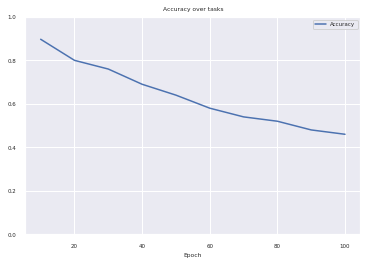

In [14]:
plotTask(accs)

In [15]:
np.diagonal(cf)

array([11, 42,  9, 28, 16,  1,  8, 23, 34, 27, 23, 13,  5, 13, 15, 15, 15,
        7, 12, 32,  2,  1, 19, 23, 17, 50, 19,  9, 20, 43, 12,  7, 20, 43,
       16,  7,  9, 33,  7, 28, 36, 36, 14,  0, 34, 38, 19,  6, 33,  4, 41,
       14,  4,  1, 10, 15, 10, 15,  7, 21,  0, 16,  7,  7,  9, 20, 10, 37,
        2,  8,  7, 34, 22,  7, 26,  5,  6, 31,  0,  8,  9, 16, 22,  3, 23,
       10,  3, 19, 21, 13, 35, 40,  6, 29, 10, 30, 15,  3, 16, 23])

In [16]:
true = np.sum(cf, axis=1)
true

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100])

In [17]:
pred = np.sum(cf, axis=0)
pred

array([ 12, 104,  13, 171,  38,   1,  10,  73,  44,  36, 227,  39,   7,
        18,  38,  53,  19,   8,  24, 540,   2,   1,  44,  41,  17, 785,
        31,  19, 101, 751,  29,   9, 174, 277,  71,  14,  16, 226,  12,
        28, 359,  58,  19,   0, 450, 917, 198,  19,  38,   4, 621,  90,
         4,   1,  17,  56,  10,  29,  11,  67,   0,  27,   7,   9,  21,
       141,  13, 475,   2,   9,  26,  52, 194,  26, 111,   5,   6, 188,
         0,   9,  47,  39,  24,   7, 129,  12,   7,  25,  36,  39, 204,
       190,   7, 523,  11,  81,  42,   4, 116,  45])

In [18]:
pred = np.array([137,  98, 142, 112,  39,  82, 116,  96, 145, 112,  84, 110,  59,
        96,  73,  78,  50,  91,  98,  92,  64, 109,  91,  72,  38,  70,
        76,  81,  89, 102,  81, 116,  72,  59, 177,  59,  62,  63,  93,
        90,  72,  79, 102,  52, 162,  68,  67,  80,  65,  98,  80,  65,
        84,  96, 121,  53,  77, 136,  69, 103,  76,  94, 109,  79, 126,
        61, 126, 106, 182,  68, 122,  94,  90,  80,  80, 159,  98, 132,
       145,  88, 170,  77,  79,  78, 131,  74, 149,  70, 149, 114, 102,
       172, 212, 134, 124, 187, 189, 114, 126, 131])

In [19]:
i = 0
for el, name in zip(pred,trainDS.__getClassesNames__()) :
  print('classe', i, 'name', name, ',preds', el)
  i+=1

classe 0 name apple ,preds 137
classe 1 name aquarium_fish ,preds 98
classe 2 name baby ,preds 142
classe 3 name bear ,preds 112
classe 4 name beaver ,preds 39
classe 5 name bed ,preds 82
classe 6 name bee ,preds 116
classe 7 name beetle ,preds 96
classe 8 name bicycle ,preds 145
classe 9 name bottle ,preds 112
classe 10 name bowl ,preds 84
classe 11 name boy ,preds 110
classe 12 name bridge ,preds 59
classe 13 name bus ,preds 96
classe 14 name butterfly ,preds 73
classe 15 name camel ,preds 78
classe 16 name can ,preds 50
classe 17 name castle ,preds 91
classe 18 name caterpillar ,preds 98
classe 19 name cattle ,preds 92
classe 20 name chair ,preds 64
classe 21 name chimpanzee ,preds 109
classe 22 name clock ,preds 91
classe 23 name cloud ,preds 72
classe 24 name cockroach ,preds 38
classe 25 name couch ,preds 70
classe 26 name crab ,preds 76
classe 27 name crocodile ,preds 81
classe 28 name cup ,preds 89
classe 29 name dinosaur ,preds 102
classe 30 name dolphin ,preds 81
classe 31 na

In [20]:
train_splits

[[94.0, 63.0, 74.0, 21.0, 35.0, 56.0, 91.0, 96.0, 87.0, 48.0],
 [68.0, 80.0, 22.0, 37.0, 60.0, 97.0, 51.0, 62.0, 92.0, 76.0],
 [75.0, 89.0, 23.0, 99.0, 39.0, 66.0, 54.0, 69.0, 84.0, 61.0],
 [85.0, 24.0, 98.0, 41.0, 73.0, 58.0, 78.0, 77.0, 70.0, 49.0],
 [65.0, 88.0, 36.0, 93.0, 45.0, 10.0, 90.0, 17.0, 32.0, 59.0],
 [83.0, 43.0, 53.0, 11.0, 86.0, 19.0, 38.0, 30.0, 40.0, 50.0],
 [57.0, 81.0, 12.0, 95.0, 25.0, 47.0, 34.0, 52.0, 44.0, 72.0],
 [46.0, 79.0, 20.0, 28.0, 5.0, 71.0, 8.0, 18.0, 33.0, 15.0],
 [55.0, 29.0, 64.0, 31.0, 67.0, 7.0, 13.0, 14.0, 42.0, 6.0],
 [82.0, 2.0, 27.0, 16.0, 26.0, 3.0, 4.0, 1.0, 9.0, 0.0]]

In [21]:
trainDS.__getClassesNames__()

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig